In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statistics as st
import plotly.express as px
from scipy import stats
import datetime as dt

# Load Data

In [174]:
df = pd.read_csv(r'C:\Users\Nakkarin Tepin\Documents\CodePython\HACKATHON\data.csv')

# Set Option

In [175]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [176]:
df.head()

,Unnamed: 0,HN,Gender,Nationality,Nation_ID,Province,City,business_unit,Type,admission_date,medication,diagnosis,age,gen_1,gen_2,gen_3,gen_4,gen_5
0,0,22ab991676308eef860ea41dcd16b27e,หญิง (Female),THAI,c2d8d1c425be582a41c371a57265c1fa,เชียงใหม่,หางดง,36,OPD,2018-01-05,['brompheniramine maleate~phenylephrine hydroc...,Acute pharyngitis,31,0,0,1,0,0
1,1,caffc028ca0671b89e1a146e76445e26,หญิง (Female),THAI,NaN,สมุทรปราการ,บางพลี,12,OPD,2016-02-02,"['Saccharomyces boulardii', 'Simethicone (Air-...",Noninfective gastroenteritis and colitis,9,1,0,0,0,0
2,2,0f849bc7d5a46e42d463d9546f77a8d9,ชาย (Male),THAI,c508f05e005daa59f561195246f56bd9,กรุงเทพมหานคร,ดินแดง,1,OPD,2017-06-25,['moxifloxacin hydrochloride'],Acute conjunctivitis,31,0,0,1,0,0
3,3,3c4bf7591b33021bbe22f4f84778408c,หญิง (Female),THAI,d41d8cd98f00b204e9800998ecf8427e,กรุงเทพมหานคร,ห้วยขวาง,1,OPD,2009-11-22,['oxytetracycline hydrochloride~polymyxin B su...,Superficial injury of lip,13,1,0,0,0,0
4,4,fabfe07e46c3c130d93be8c42c2413c3,หญิง (Female),THAI,fe9ed84d5fb4f8a89c6e23562ef859a5,สมุทรปราการ,บางพลี,12,OPD,2016-02-03,"['Cetirizine (Zyrtec)', 'Azithromycin (Zithrom...",Acute nasopharyngitis [common cold,38,0,0,1,0,0


# Drop Data บางอย่างที่ไม่จำเป็นออกไป

In [177]:
df.drop(['gen_1','gen_2','gen_3','gen_4','gen_5'], inplace=True, axis = 1)

In [178]:
df.drop(['HN', 'Nation_ID','admission_date', 'medication', 'Unnamed: 0', 'Nationality'], inplace=True, axis = 1)

In [179]:
df.columns

Index(['Gender', 'Province', 'City', 'business_unit', 'Type', 'diagnosis',
       'age'],
      dtype='object')

# ตัวสอบค่า Missing

In [180]:
df.isnull().sum()

Gender             0
Province         191
City             164
business_unit      0
Type               0
diagnosis         14
age                0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         10000 non-null  object
 1   Province       9809 non-null   object
 2   City           9836 non-null   object
 3   business_unit  10000 non-null  int64 
 4   Type           10000 non-null  object
 5   diagnosis      9986 non-null   object
 6   age            10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


# Plot Data ที่เป็น Missing ออกมาดู

<AxesSubplot:>

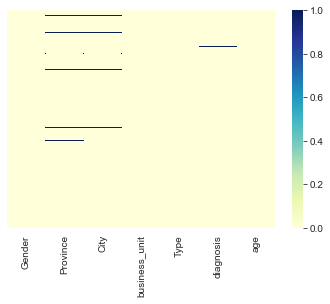

In [182]:
sns.heatmap(df.isnull(), yticklabels = False, cmap="YlGnBu")

# ลบหรือเเทนที่ ค่าที่เป็น Missing

In [183]:
for col in df:
    df[col] = df[col].fillna(st.mode(df[col].dropna()))

In [184]:
df.isnull().sum()

Gender           0
Province         0
City             0
business_unit    0
Type             0
diagnosis        0
age              0
dtype: int64

In [185]:
df.head()

,Gender,Province,City,business_unit,Type,diagnosis,age
0,หญิง (Female),เชียงใหม่,หางดง,36,OPD,Acute pharyngitis,31
1,หญิง (Female),สมุทรปราการ,บางพลี,12,OPD,Noninfective gastroenteritis and colitis,9
2,ชาย (Male),กรุงเทพมหานคร,ดินแดง,1,OPD,Acute conjunctivitis,31
3,หญิง (Female),กรุงเทพมหานคร,ห้วยขวาง,1,OPD,Superficial injury of lip,13
4,หญิง (Female),สมุทรปราการ,บางพลี,12,OPD,Acute nasopharyngitis [common cold,38


# คำนวนหาอายุ เเละ ช่วงอายุ
# age นี้คำ นวนมากจากอีก code หนึ่ง

In [186]:
df['gen'] = df['age']

In [187]:
i = 0
for cat in df['age']:  
    
    #วัยเด็ก
    if cat <=13:
        df.at[i, 'gen'] = 1

    #วัยรุ่น
    elif cat >=14 and cat <=20:
        df.at[i, 'gen'] = 2
    
    #วัยผู้ใหญ่
    elif cat >=21 and cat <=39:
        df.at[i, 'gen'] = 3

    # วัยกลางคน
    elif cat >=40 and cat <=60:
        df.at[i, 'gen'] = 4
 
    #วัยสูงอายุ
    elif cat > 60:
        df.at[i, 'gen'] = 5
   
    
    else:
        print('พบข้อผิดพลาด')
        
    i = i+1

# ช่วงอายุ
* 1 วัยเด็ก
* 2 วัยรุ่น
* 3 วัยผู้ใหญ่
* 4 วัยกลางคน
* 5 วัยสูงอายุ

In [188]:
df.head()

,Gender,Province,City,business_unit,Type,diagnosis,age,gen
0,หญิง (Female),เชียงใหม่,หางดง,36,OPD,Acute pharyngitis,31,3
1,หญิง (Female),สมุทรปราการ,บางพลี,12,OPD,Noninfective gastroenteritis and colitis,9,1
2,ชาย (Male),กรุงเทพมหานคร,ดินแดง,1,OPD,Acute conjunctivitis,31,3
3,หญิง (Female),กรุงเทพมหานคร,ห้วยขวาง,1,OPD,Superficial injury of lip,13,1
4,หญิง (Female),สมุทรปราการ,บางพลี,12,OPD,Acute nasopharyngitis [common cold,38,3


# ทำหมวดหมู่

In [189]:
datas = df[['Gender', 'Province', 'diagnosis', 'City']].head()

In [190]:
Gender = df['Gender']
Province = df['Province']
diagnosis = df['diagnosis']
City = df['City']
Type = df['Type']

In [191]:
cat = []
for i in Province:
     cat.append(i)
        
le = LabelEncoder()
le.fit(cat)
data = le.transform(cat)
df['new_Province'] = data
df.drop(['Province'], inplace = True, axis = 1)

In [192]:
cat = []
for i in Gender:
     cat.append(i)
        
le = LabelEncoder()
le.fit(cat)
data = le.transform(cat)
df['new_Gender'] = data
df.drop(['Gender'], inplace = True, axis = 1)

In [193]:
cat = []
for i in diagnosis:
     cat.append(i)
        
le = LabelEncoder()
le.fit(cat)
data = le.transform(cat)
df['new_diagnosis'] = data
df.drop(['diagnosis'], inplace = True, axis = 1)

In [194]:
cat = []
for i in City:
     cat.append(i)
        
le = LabelEncoder()
le.fit(cat)
data = le.transform(cat)
df['new_City'] = data
df.drop(['City'], inplace = True, axis = 1)

In [195]:
cat = []
for i in Type:
     cat.append(i)
        
le = LabelEncoder()
le.fit(cat)
data = le.transform(cat)
df['new_Type'] = data
df.drop(['Type'], inplace = True, axis = 1)

In [196]:
df.head()

,business_unit,age,gen,new_Province,new_Gender,new_diagnosis,new_City,new_Type
0,36,31,3,133,1,108,362,1
1,12,9,1,114,1,1209,182,1
2,1,31,3,62,0,85,122,1
3,1,13,1,62,1,1943,364,1
4,12,38,3,114,1,102,182,1


# หาความสัมพันธ์

In [197]:
Correlation = df.corr()['business_unit']
Correlation[np.argsort(Correlation)[::-1]]

business_unit    1.000000
new_Province     0.390765
new_City         0.256499
new_diagnosis    0.075789
new_Gender       0.001282
new_Type        -0.037683
gen             -0.128324
age             -0.128662
Name: business_unit, dtype: float64

# visualization

<AxesSubplot:xlabel='business_unit', ylabel='count'>

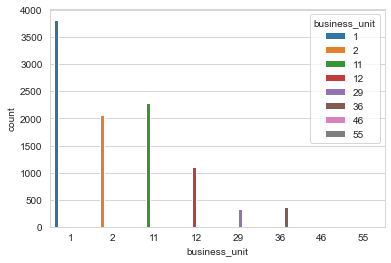

In [198]:
sns.set_style('whitegrid')
sns.countplot(x='business_unit', hue='business_unit', data=df)

C:\Users\Nakkarin Tepin\anaconda3\envs\TF2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



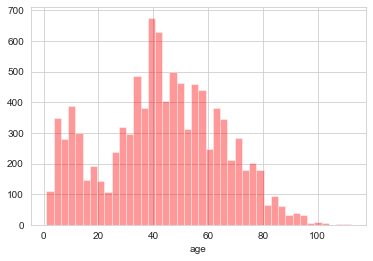

In [199]:
sns.distplot(df["age"],color='r', kde=False);

<AxesSubplot:xlabel='gen', ylabel='count'>

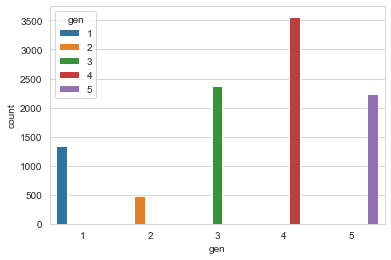

In [200]:
sns.set_style('whitegrid')
sns.countplot(x='gen', hue='gen', data=df)

<AxesSubplot:xlabel='new_Gender', ylabel='count'>

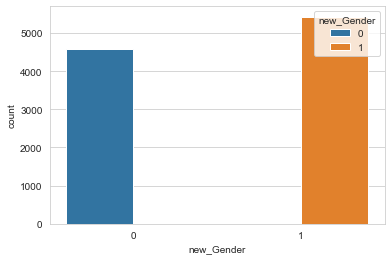

In [201]:

sns.set_style('whitegrid')
sns.countplot(x='new_Gender', hue='new_Gender', data=df)

In [202]:
temp = df.groupby(by="business_unit").count()
name = temp.new_diagnosis.index
val = temp.new_diagnosis.values

fig = px.scatter_polar(temp, r=val, theta=name,color=name, symbol=val, 
                       size=val,color_discrete_sequence=px.colors.sequential.Plasma_r, title='business_unit')
fig.show()


# เตรียม Data

In [203]:
data_y = df['business_unit']
#df.drop(['new_diagnosis'], inplace=True, axis =1)

In [204]:
df.head()

,business_unit,age,gen,new_Province,new_Gender,new_diagnosis,new_City,new_Type
0,36,31,3,133,1,108,362,1
1,12,9,1,114,1,1209,182,1
2,1,31,3,62,0,85,122,1
3,1,13,1,62,1,1943,364,1
4,12,38,3,114,1,102,182,1


In [205]:
#data_x = df[['age', 'gen', 'new_Province', 'new_Gender','new_diagnosis', 'new_Type']]
data_x = df[['age', 'gen', 'new_Province', 'new_Gender','new_diagnosis', 'new_Type']]

In [206]:
data_x.head()

,age,gen,new_Province,new_Gender,new_diagnosis,new_Type
0,31,3,133,1,108,1
1,9,1,114,1,1209,1
2,31,3,62,0,85,1
3,13,1,62,1,1943,1
4,38,3,114,1,102,1


In [207]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size= 1/4, random_state=1)

# Classifier 

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [209]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

# Test ACC

In [210]:
clf.score(x_test, y_test)

0.7512